In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
import matplotlib_inline 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Formating Plots
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

In [3]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     

    if typ == 'line':
        for line in ax.lines:
            for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
                label = "{:.2f}".format(y_value)
                ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)

In [4]:
df = pd.read_csv(r"C:\Users\ssai\OneDrive\Data_26-07\labs\lab-cleaning-categorical-data\files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
df = df.drop("Customer", axis = 1)

In [6]:
df.rename(columns=lambda col: col.replace(' ', '_').lower(), inplace=True)

In [7]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
numerical_df = df.select_dtypes(np.number)
categorical_df = df.select_dtypes(object)

In [9]:
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [11]:
df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


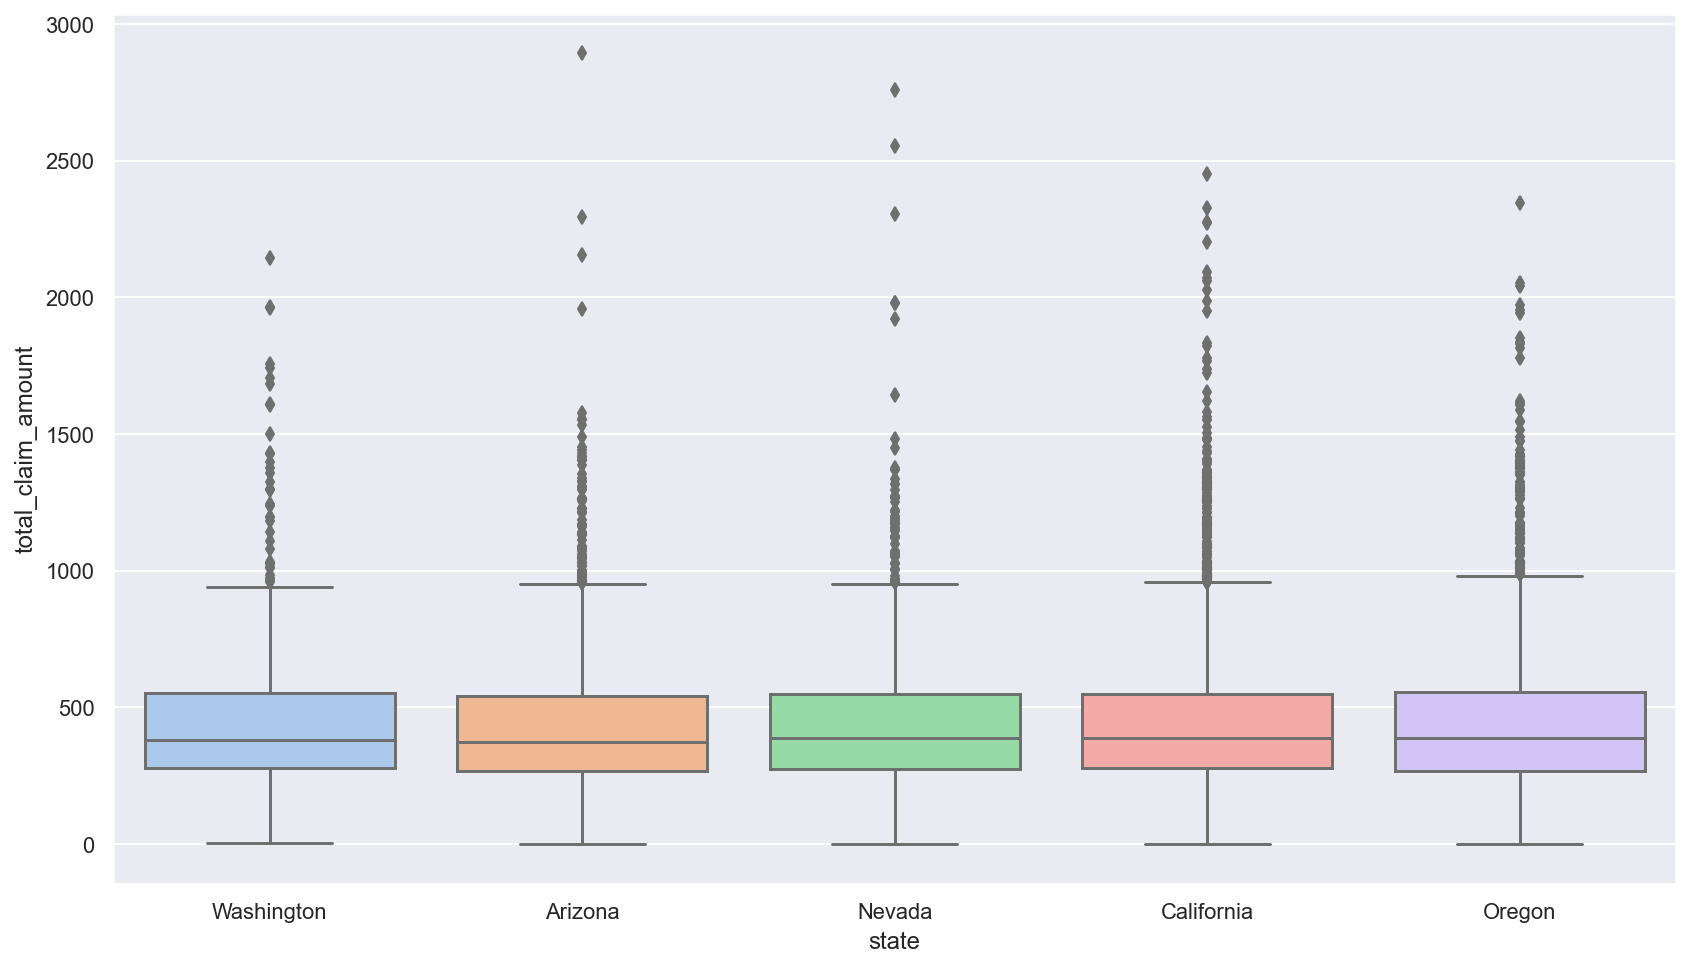

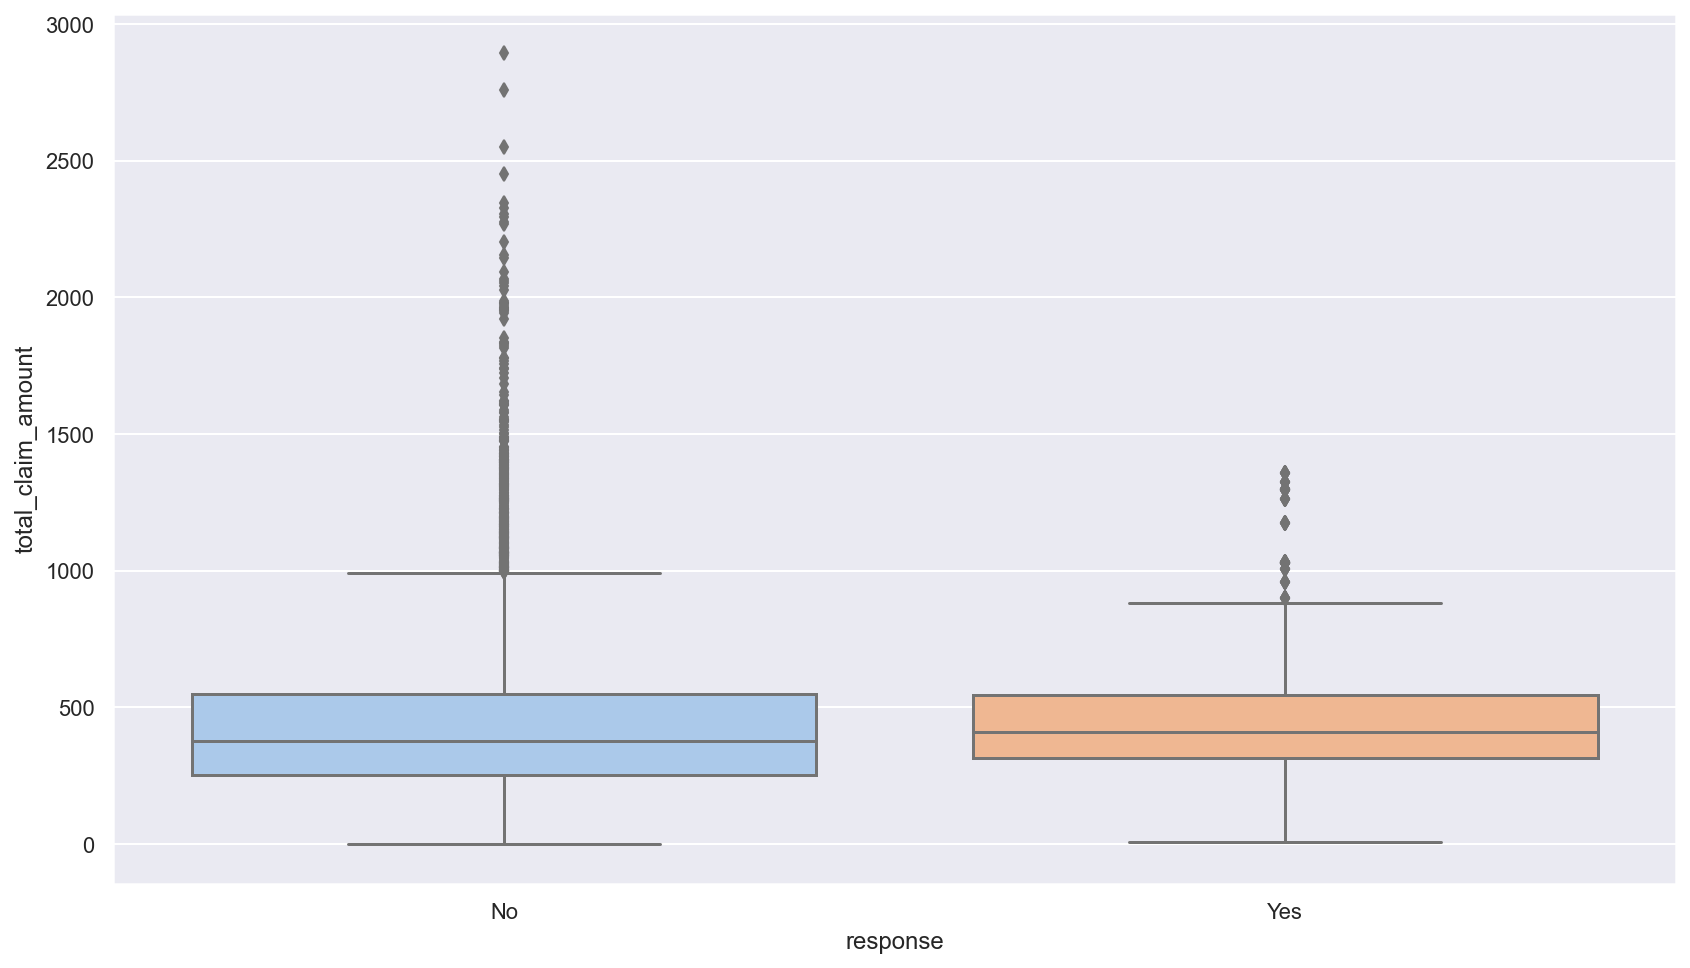

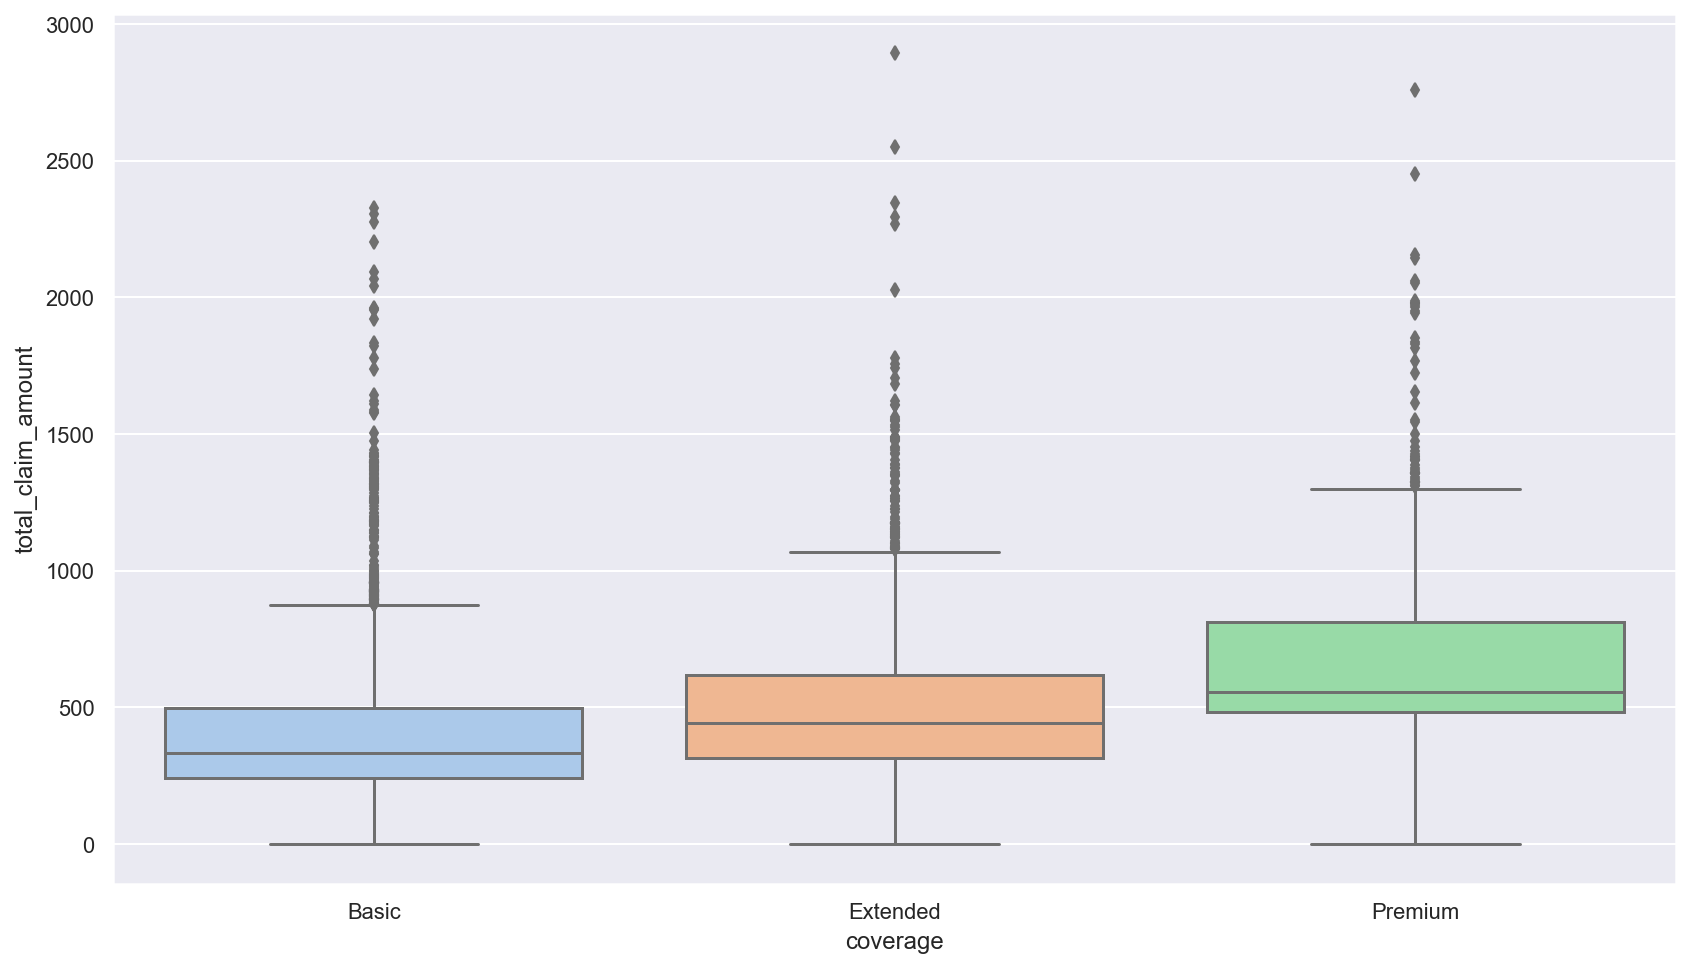

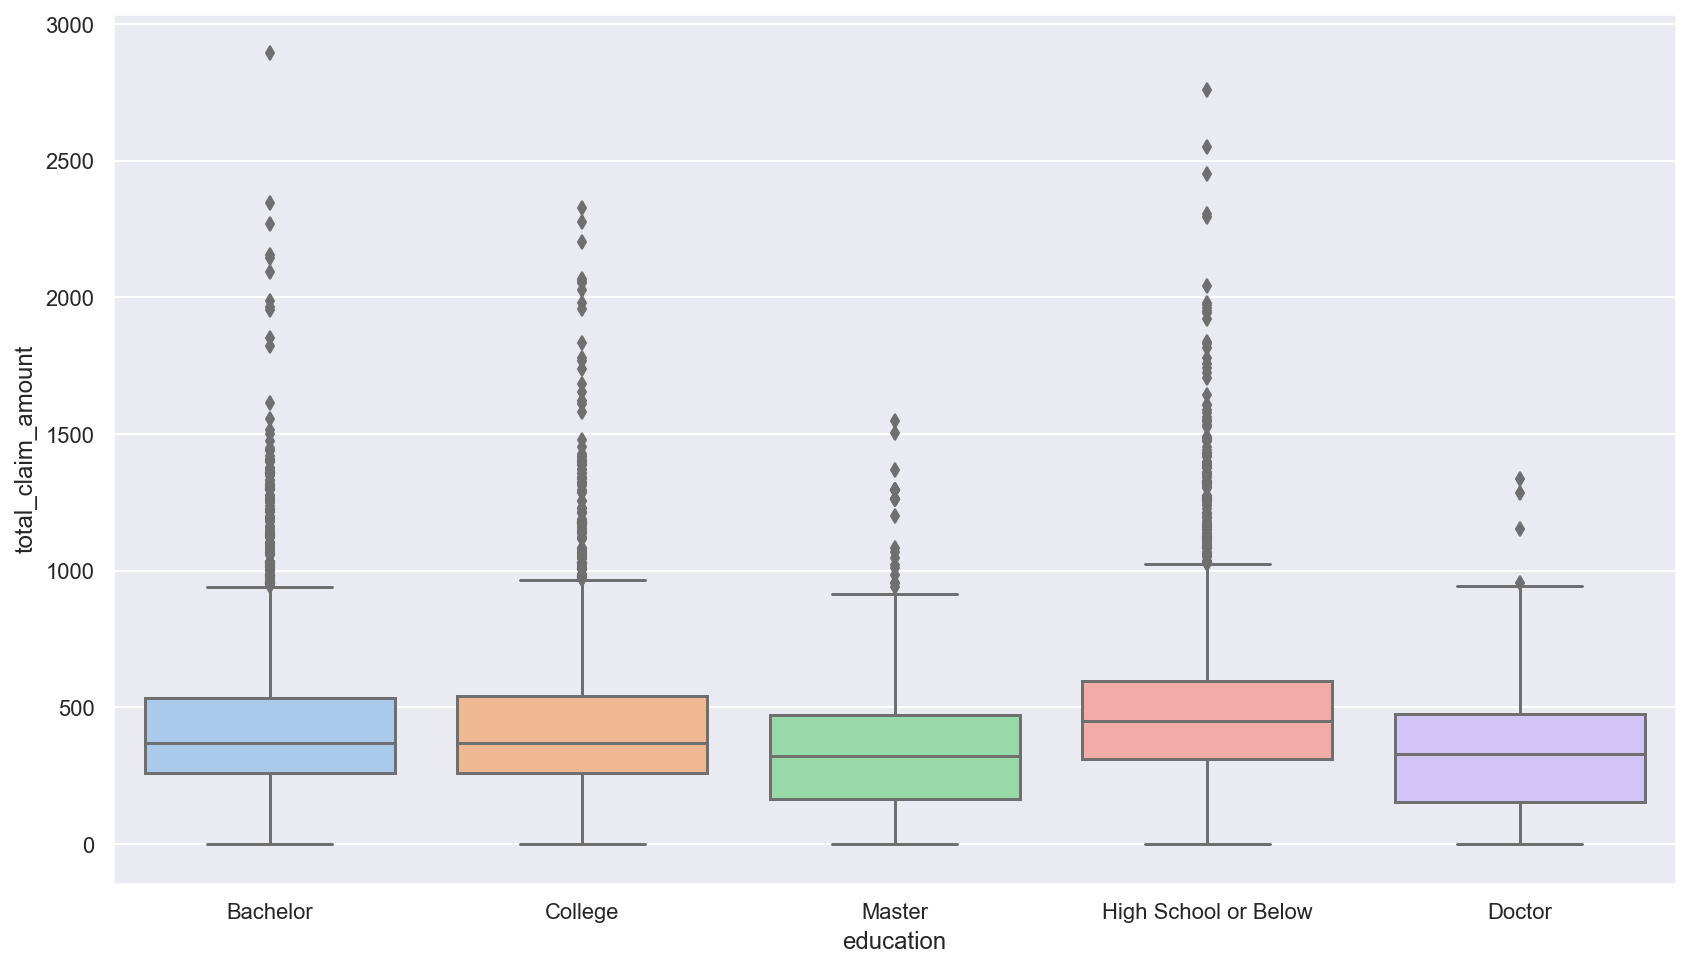

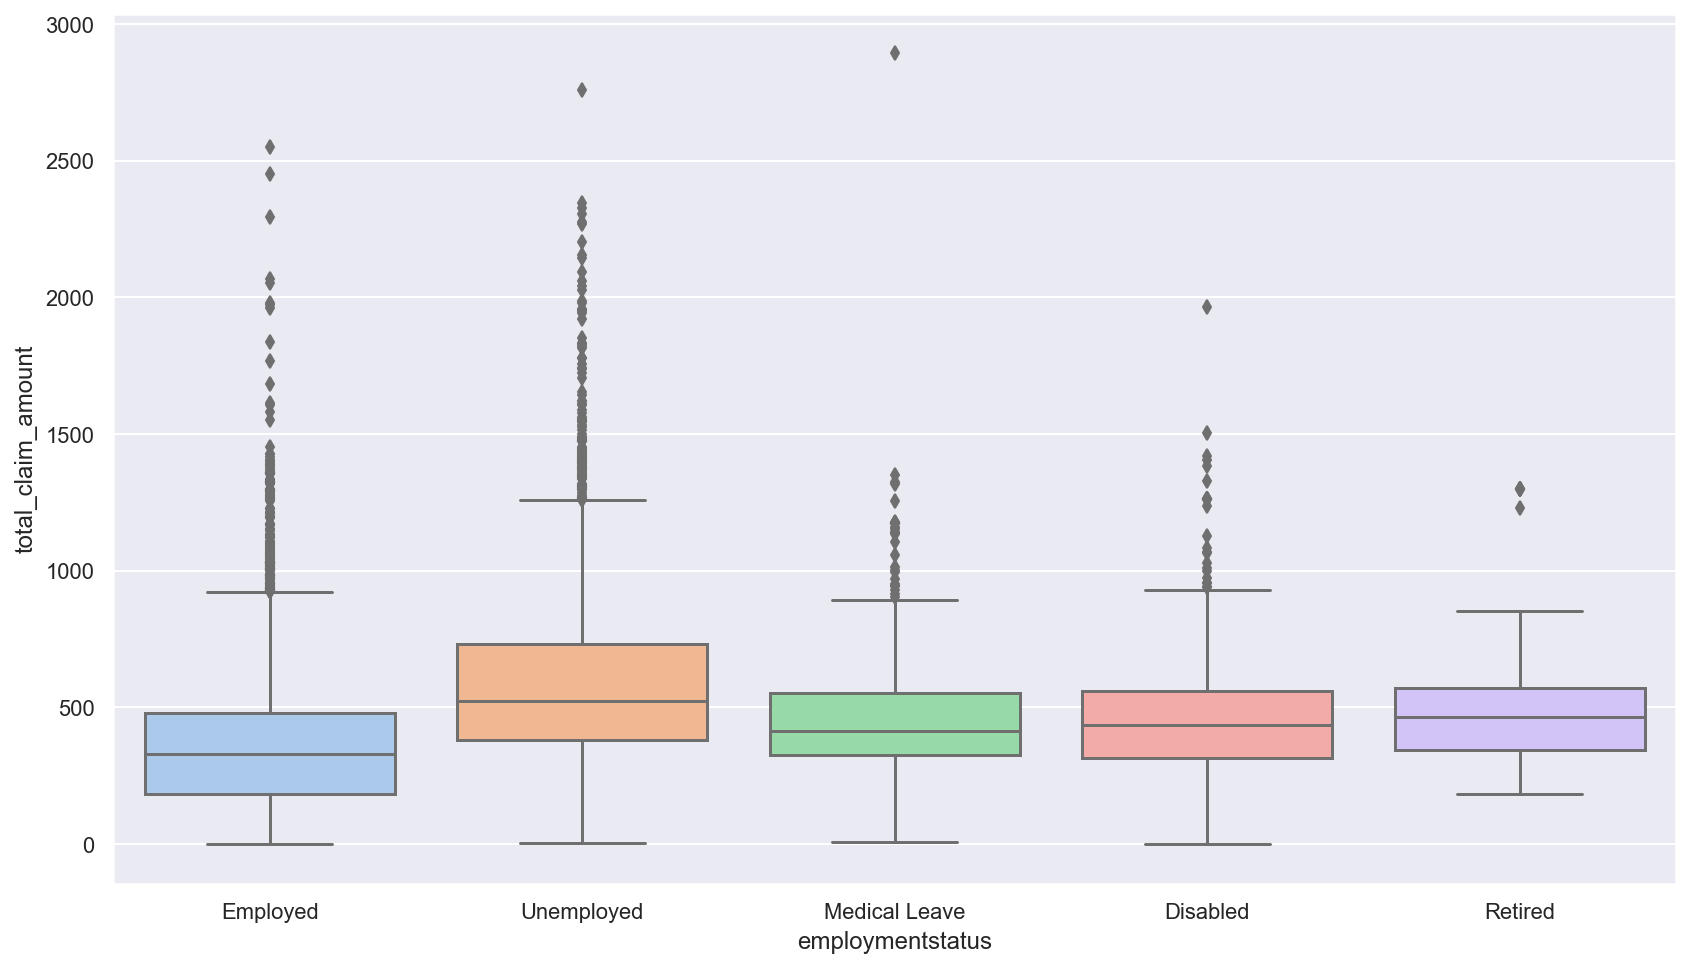

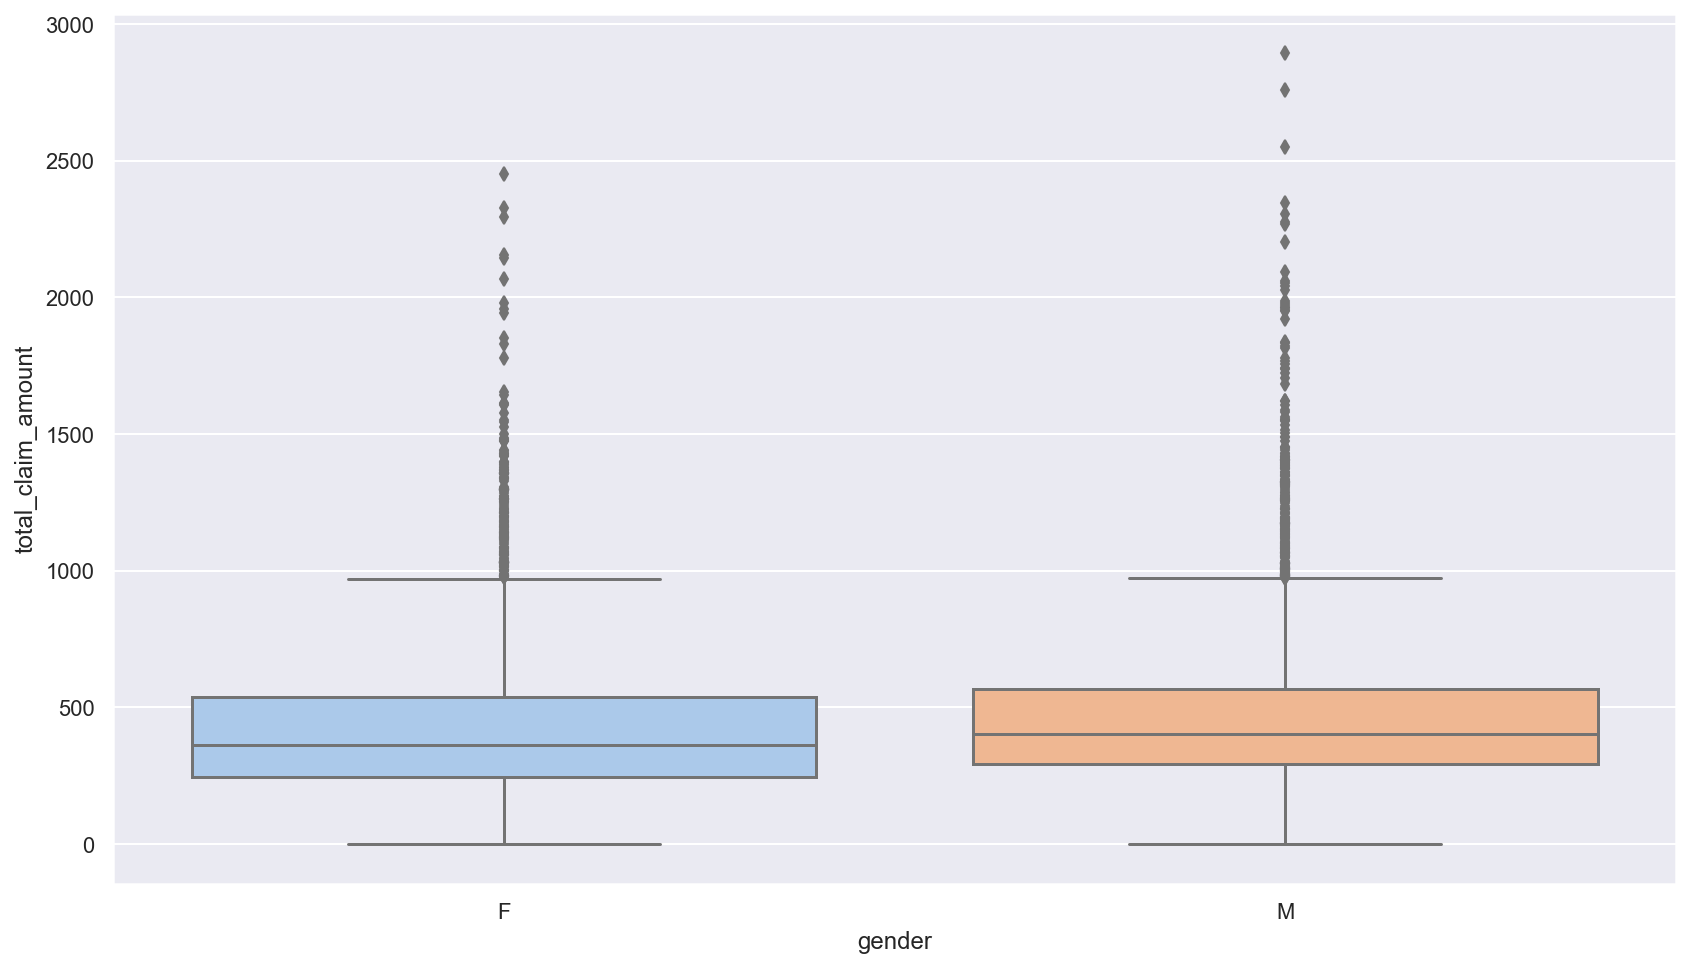

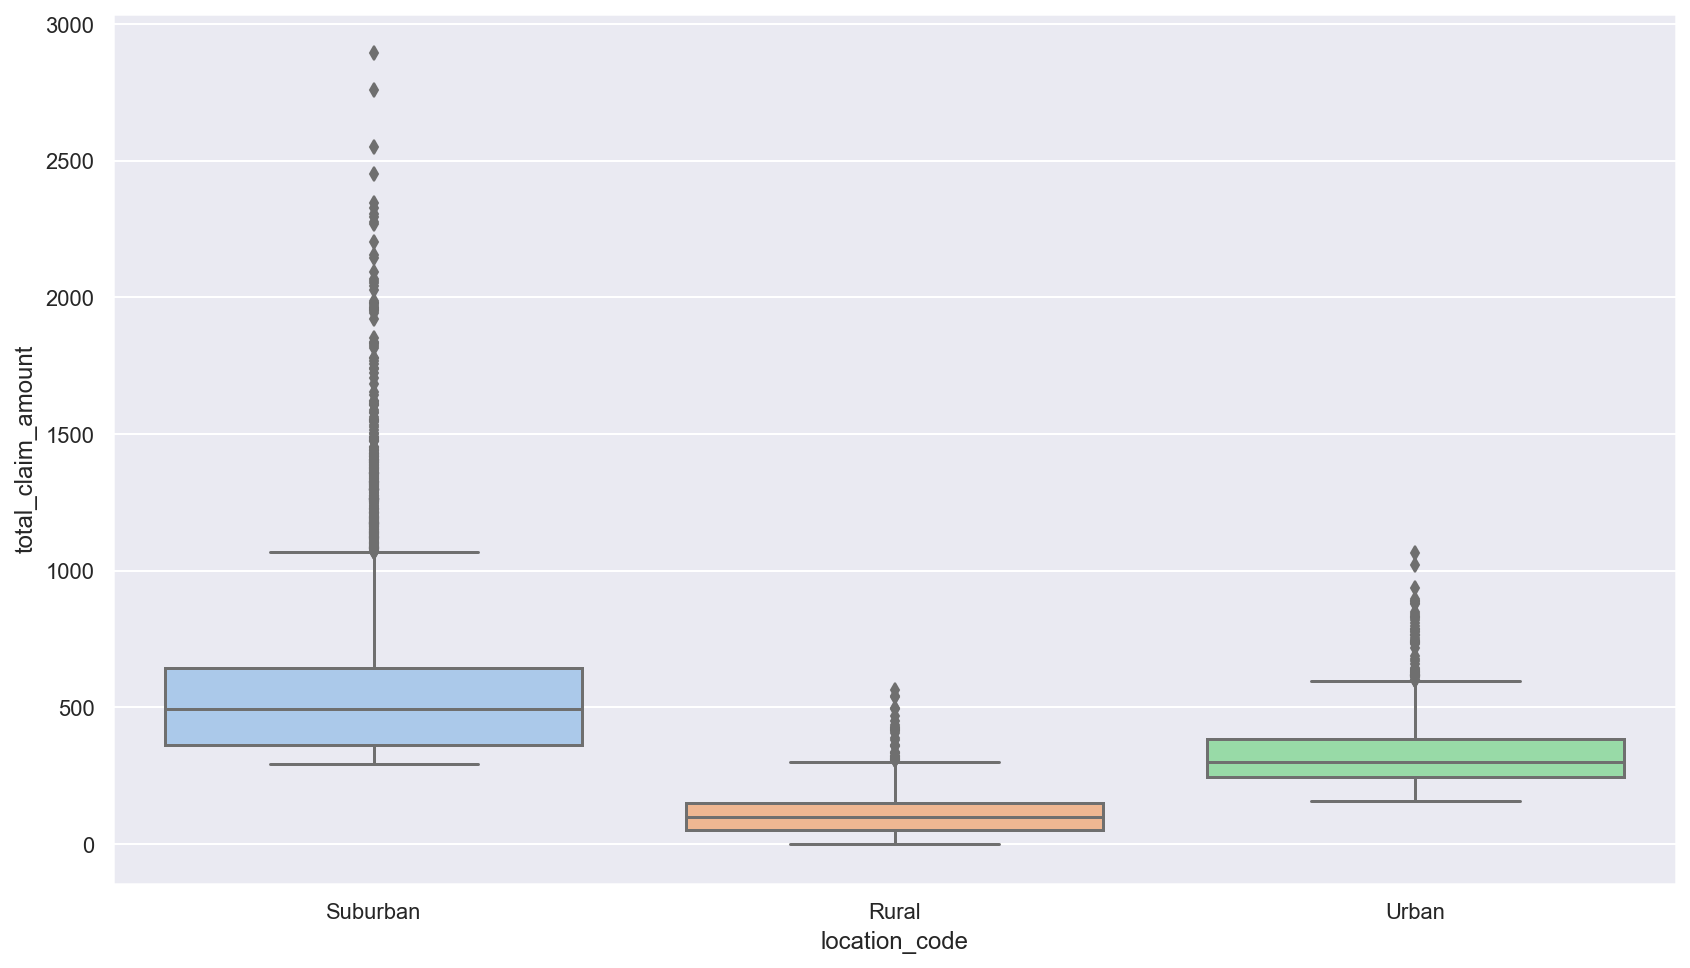

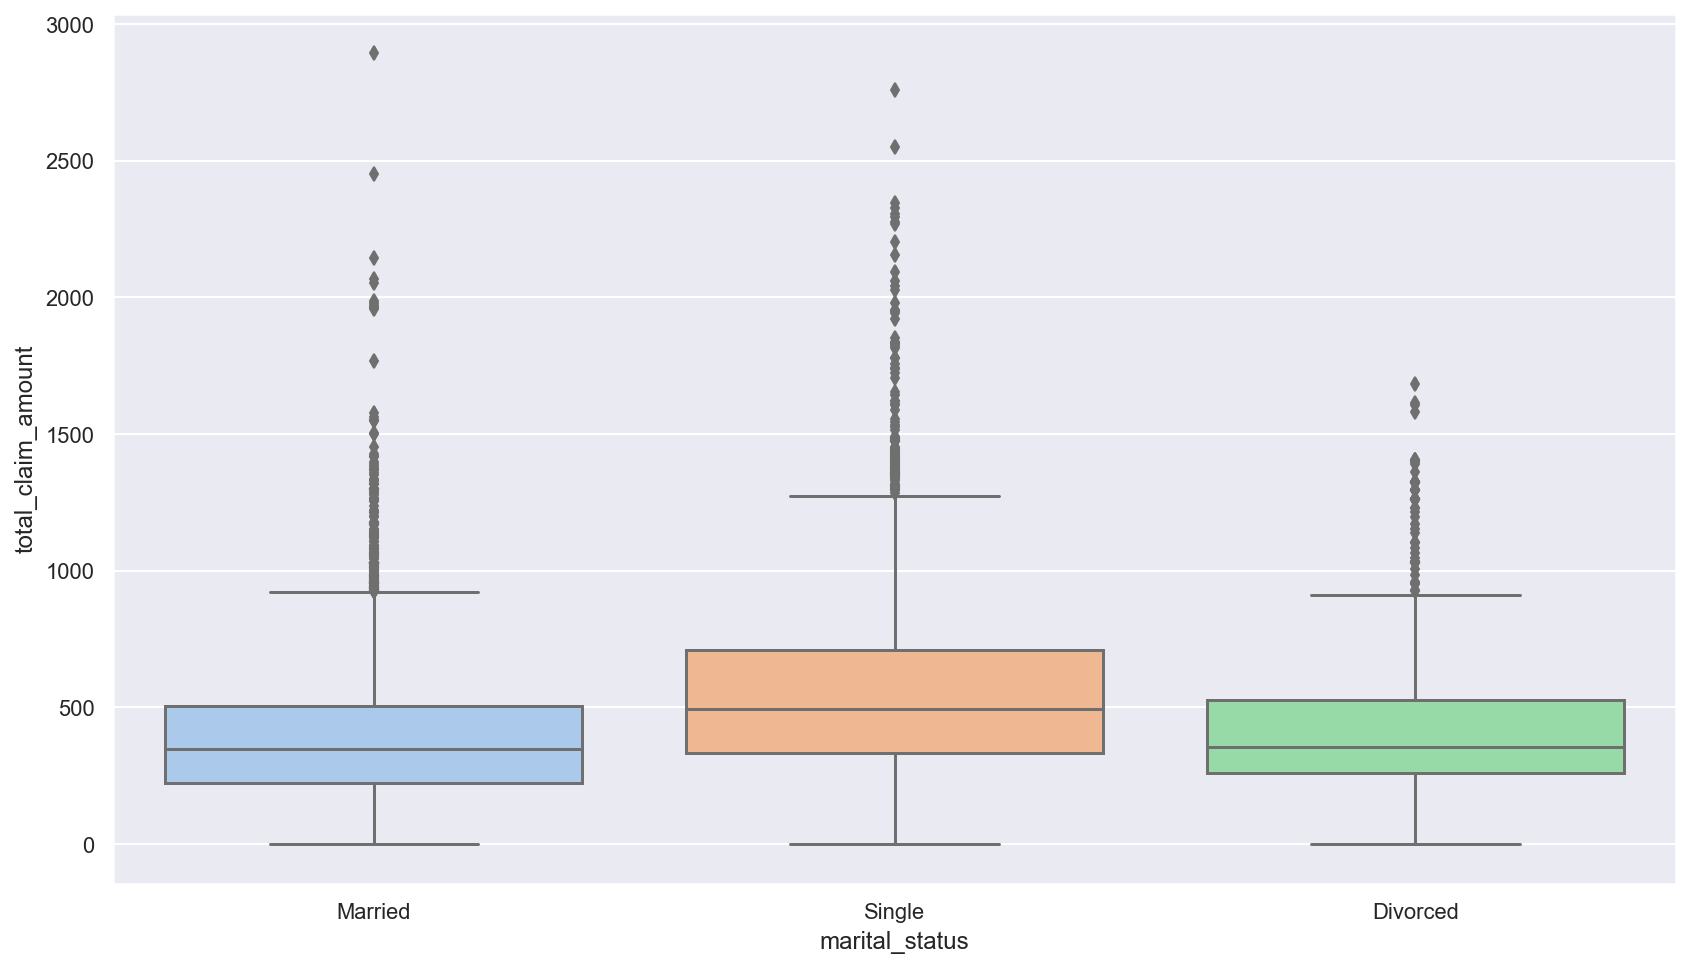

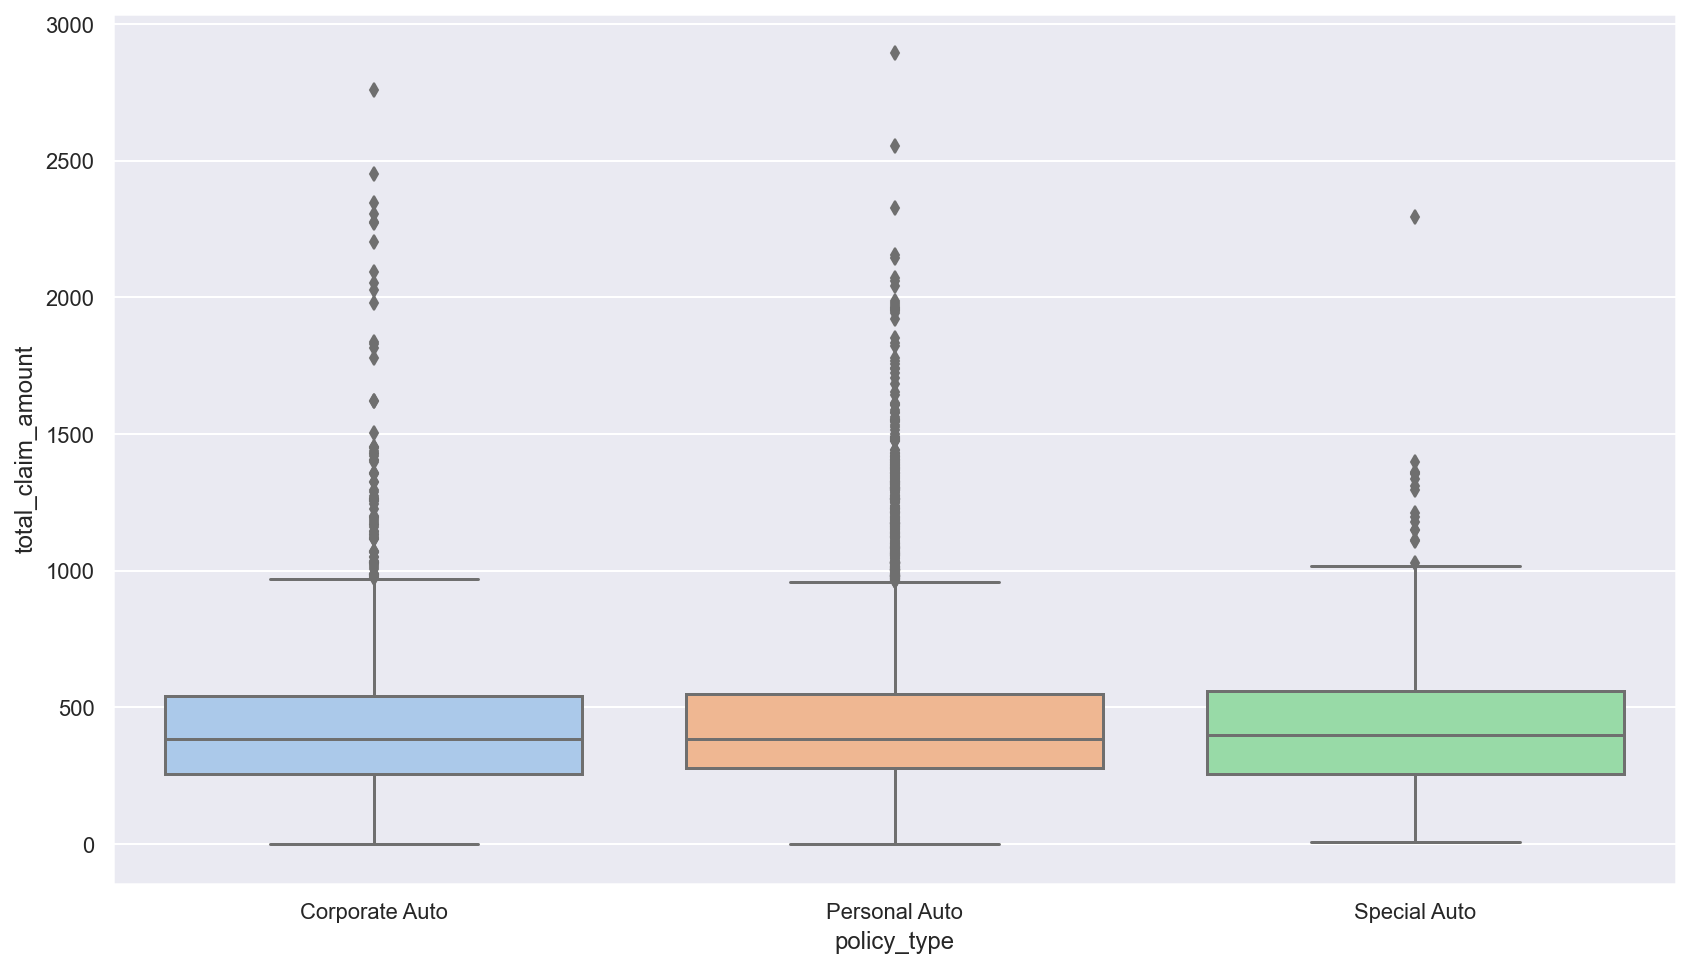

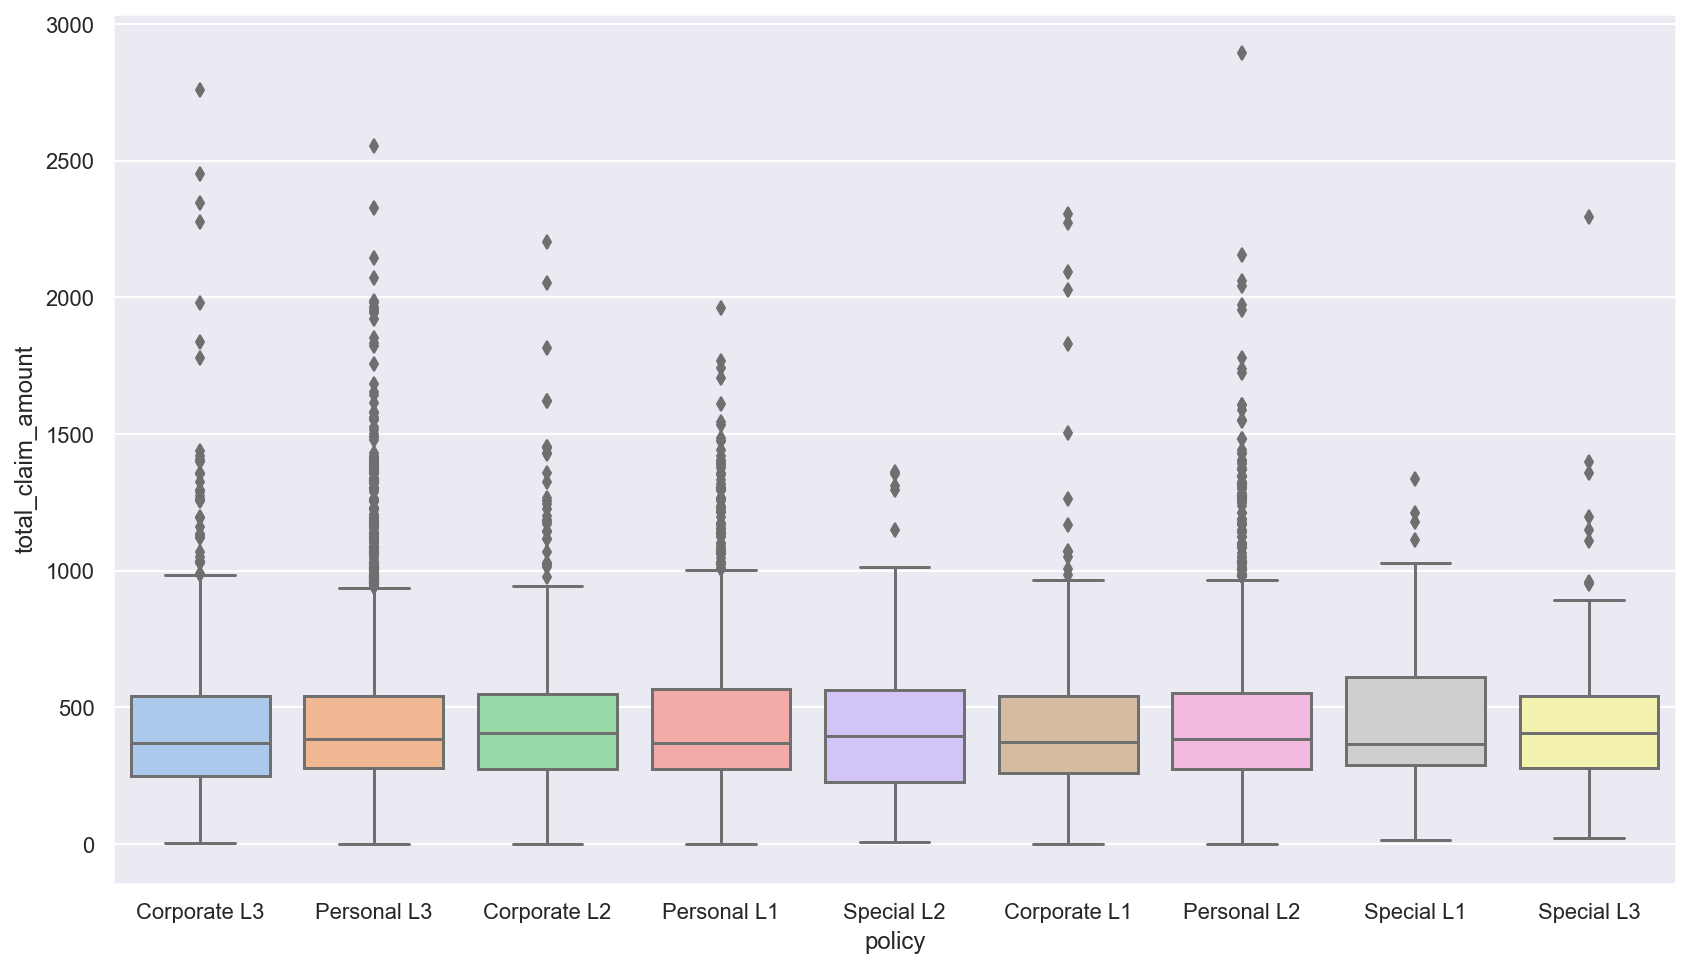

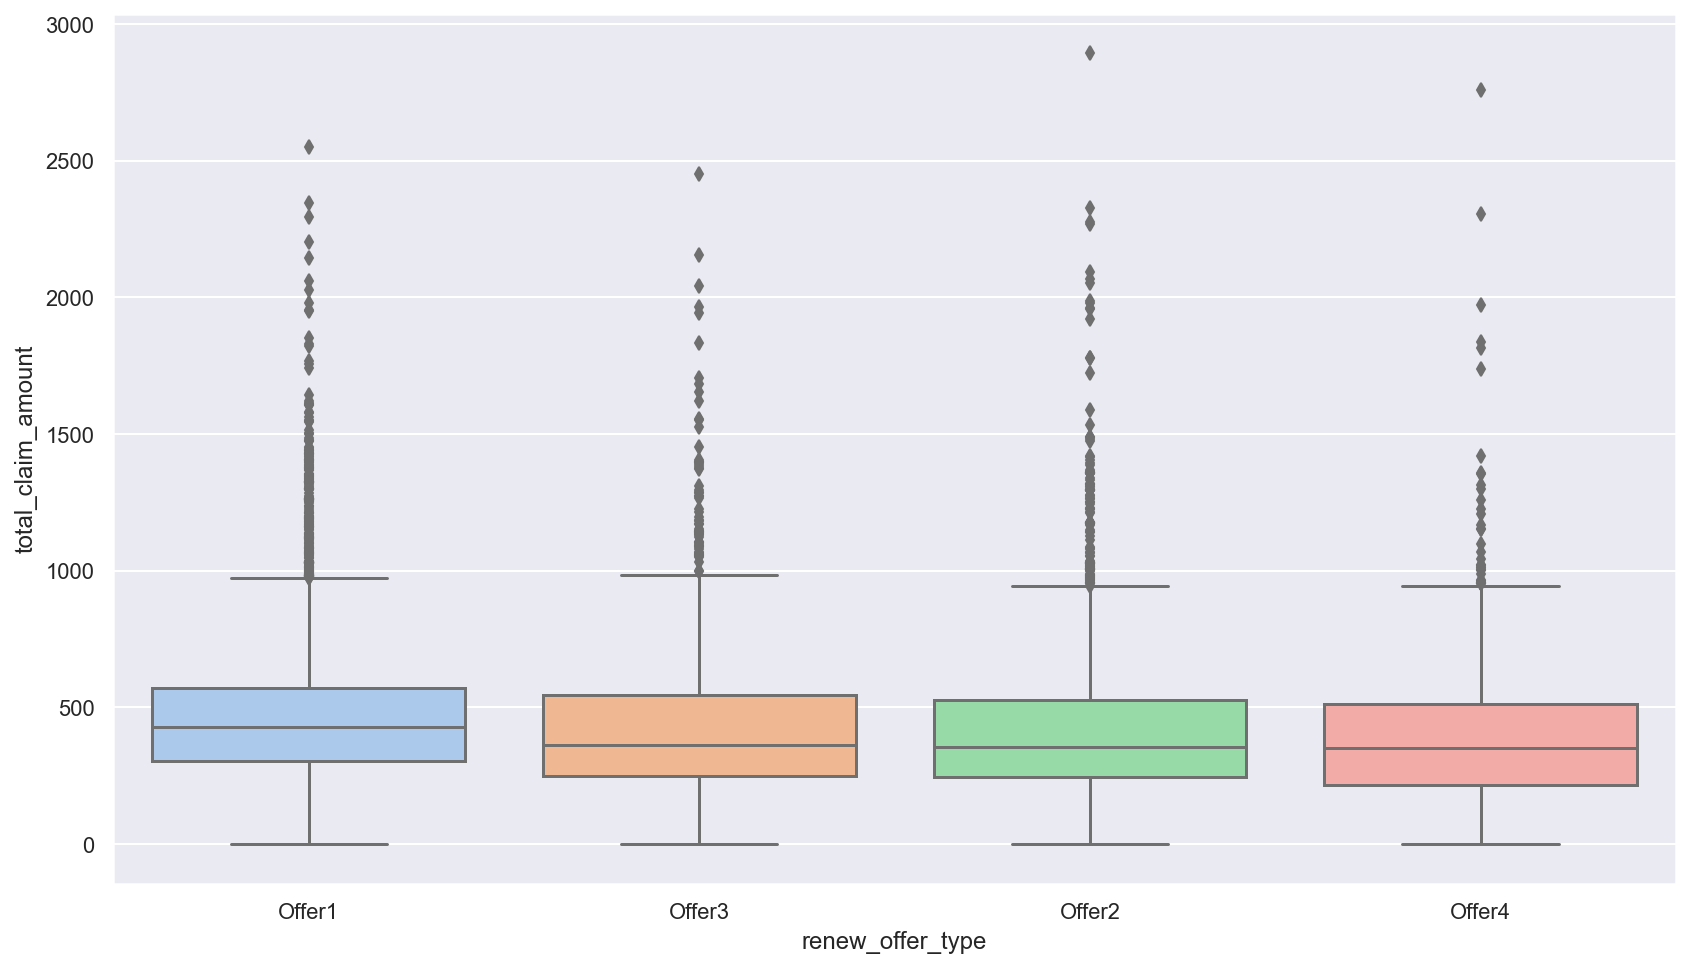

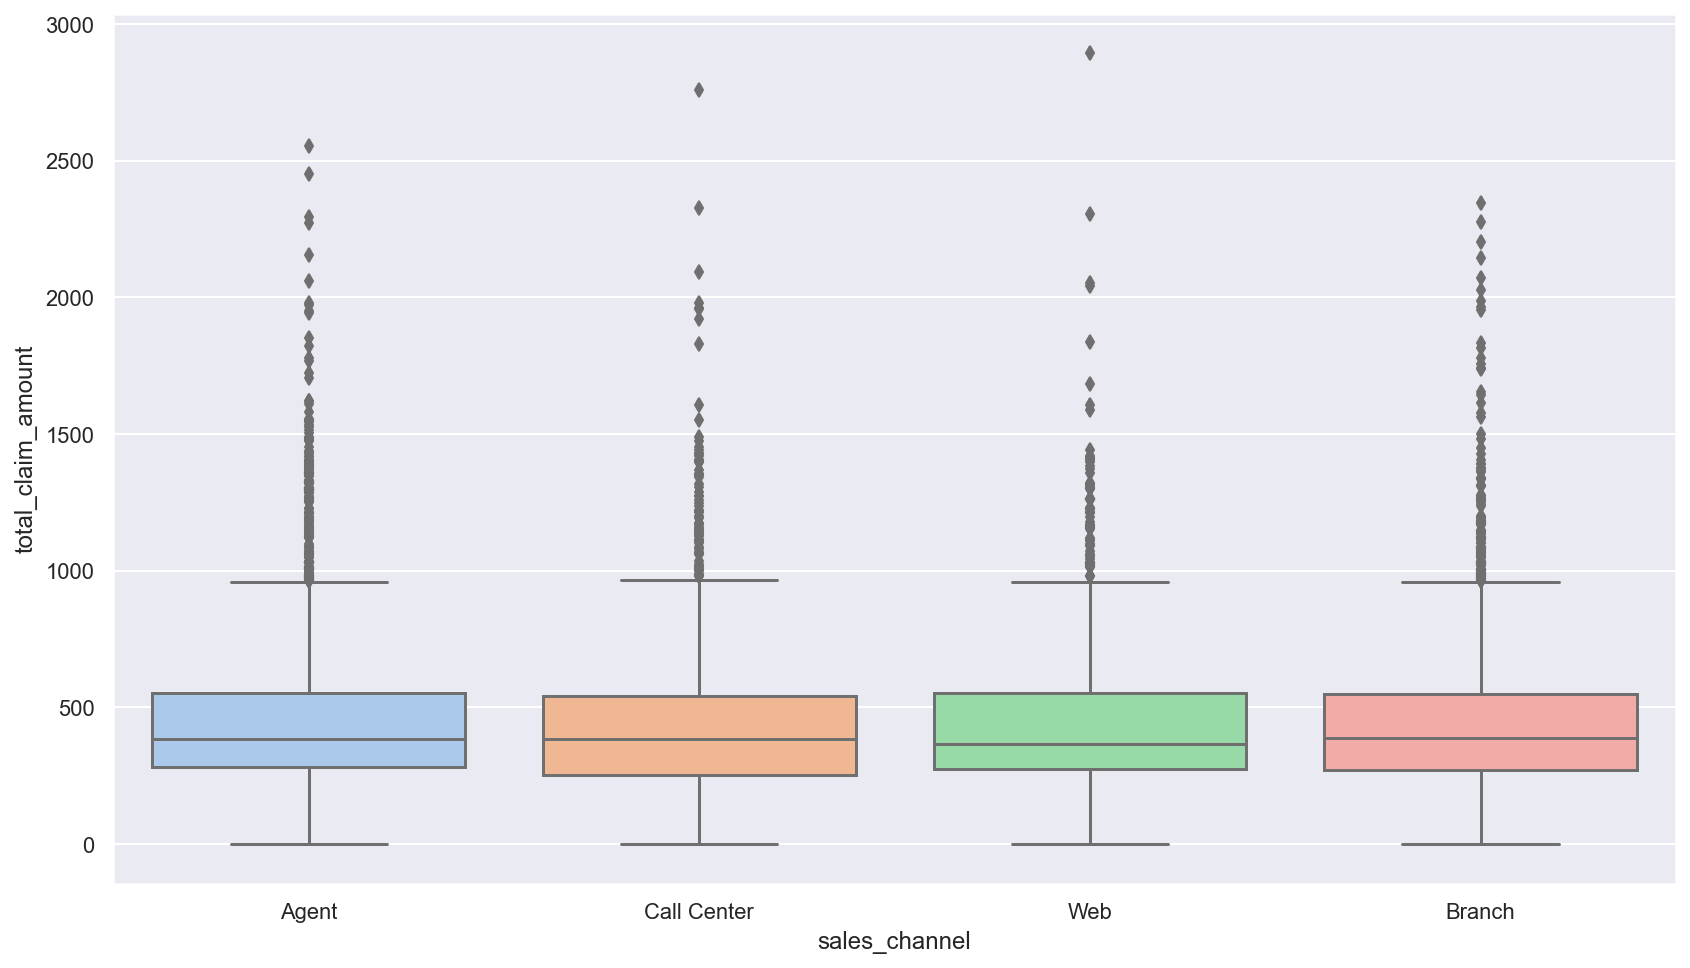

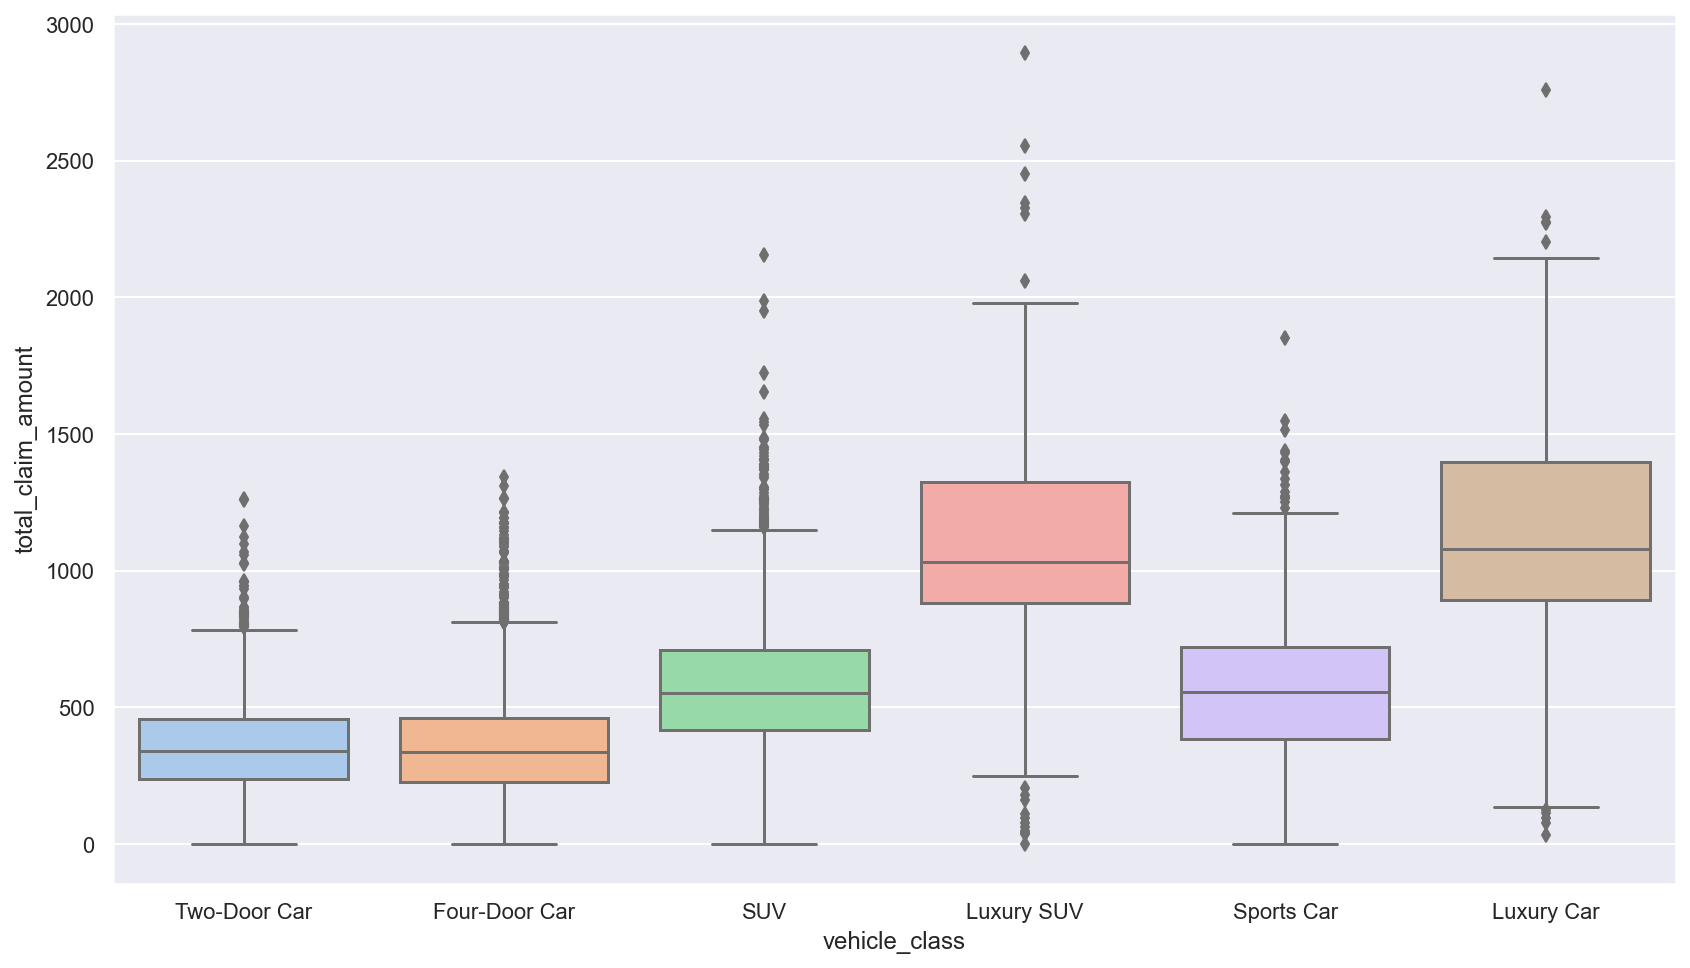

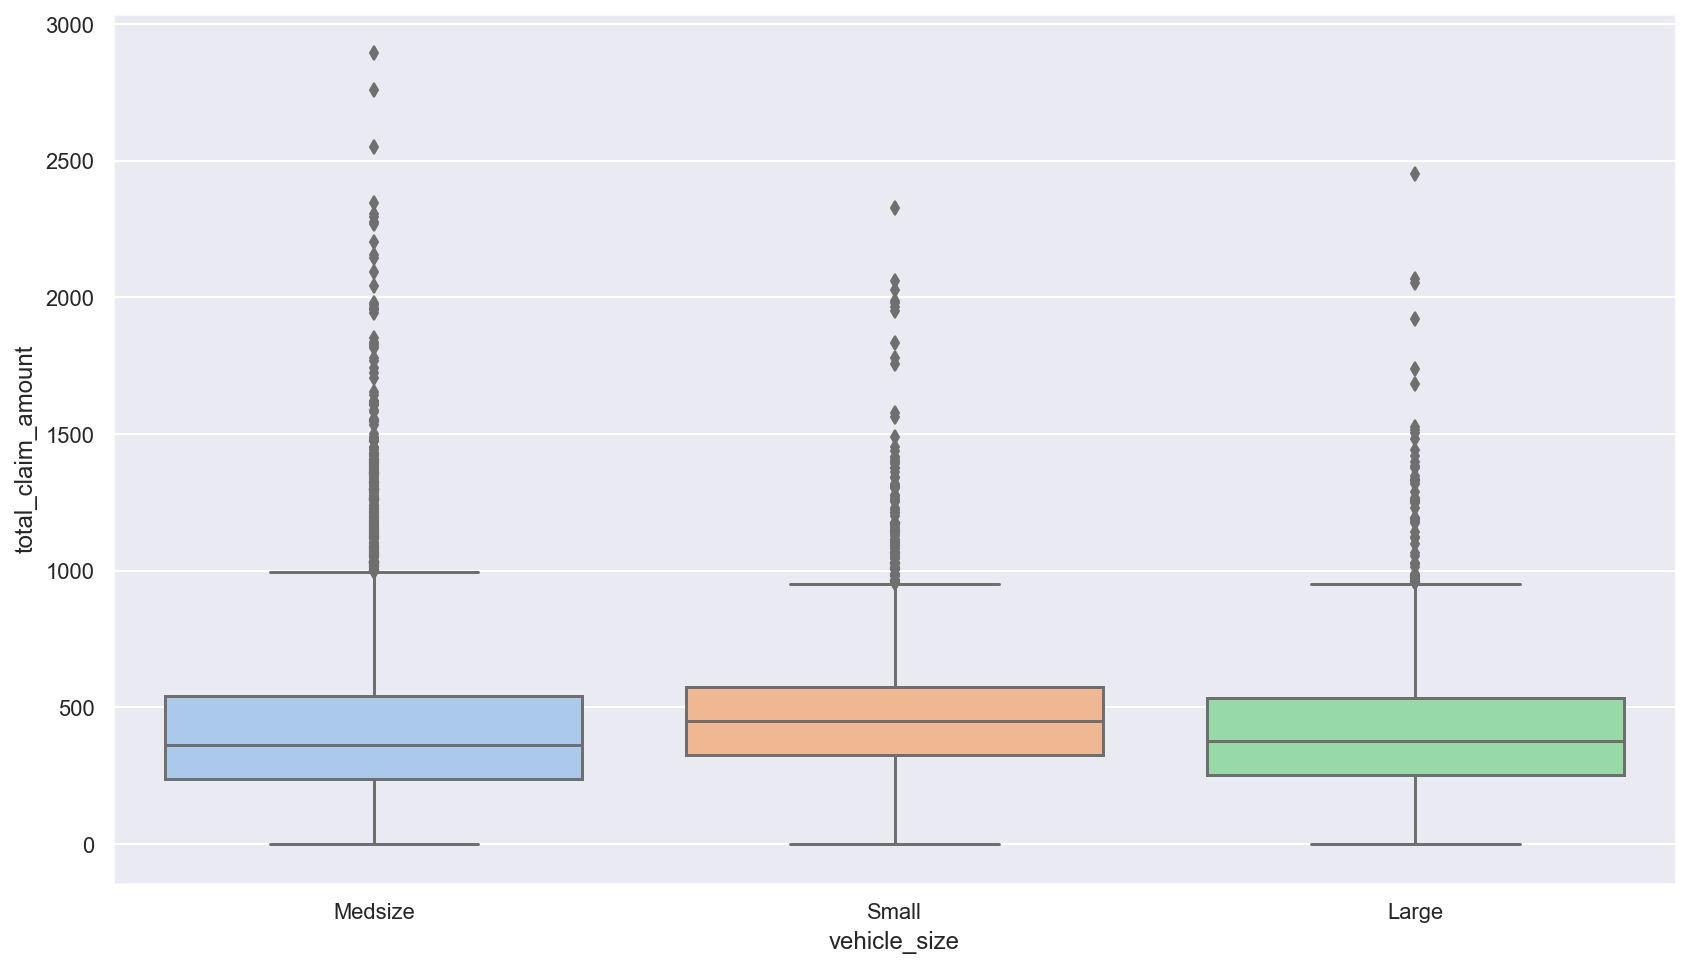

In [12]:
for cat in categorical_df:
    sns.boxplot( x=categorical_df[cat], y=df["total_claim_amount"] )
    plt.show()

In [59]:
for cat in categorical_df.iloc[:,0:3]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')



state
California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64

response
No     0.856799
Yes    0.143201
Name: response, dtype: float64

coverage
Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: coverage, dtype: float64



In [60]:
for cat in categorical_df.iloc[:,3:6]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')

education
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: education, dtype: float64

employmentstatus
Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: employmentstatus, dtype: float64

gender
F    0.509963
M    0.490037
Name: gender, dtype: float64



In [61]:
for cat in categorical_df.iloc[:,6:9]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')

location_code
Suburban    0.632691
Rural       0.194110
Urban       0.173199
Name: location_code, dtype: float64

marital_status
Married     0.580031
Single      0.270090
Divorced    0.149880
Name: marital_status, dtype: float64

policy_type
Personal Auto     0.743157
Corporate Auto    0.215459
Special Auto      0.041384
Name: policy_type, dtype: float64



In [62]:
for cat in categorical_df.iloc[:,9:11]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')

policy
Personal L3     0.375082
Personal L2     0.232319
Personal L1     0.135757
Corporate L3    0.111014
Corporate L2    0.065141
Corporate L1    0.039304
Special L2      0.017955
Special L3      0.016203
Special L1      0.007226
Name: policy, dtype: float64

renew_offer_type
Offer1    0.410773
Offer2    0.320342
Offer3    0.156777
Offer4    0.112109
Name: renew_offer_type, dtype: float64



In [63]:
for cat in categorical_df.iloc[:, 11:13]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')

sales_channel
Agent          0.380666
Branch         0.281038
Call Center    0.193234
Web            0.145062
Name: sales_channel, dtype: float64

vehicle_class
Four-Door Car    0.505912
Two-Door Car     0.206481
SUV              0.196628
Sports Car       0.052989
Luxury SUV       0.020145
Luxury Car       0.017845
Name: vehicle_class, dtype: float64



In [64]:
for cat in categorical_df.iloc[:, 13:15]:
    print(cat)
    print(categorical_df[cat].value_counts(normalize=True), end='\n\n')

vehicle_size
Medsize    0.703306
Small      0.193125
Large      0.103569
Name: vehicle_size, dtype: float64

